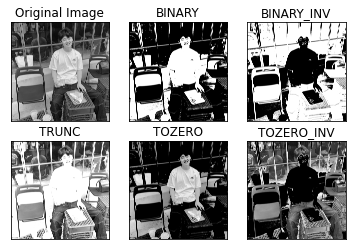

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./image/KakaoTalk_20200716_190403007.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [10]:
# Adaptive Thresholding

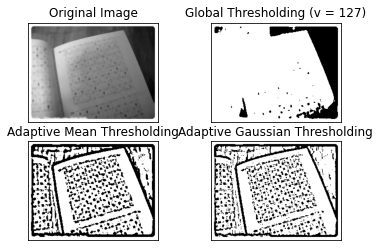

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./image/sdoku.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [ ]:
# Otsu’s Binarization

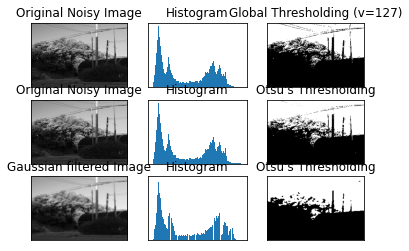

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('./image/gray.jpg',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
# histogram

In [16]:
img = cv2.imread('./image/gray.jpg',0)
h,w = img.shape
hist = np.zeros(256, np.uint32)

for i in range(h):
    for j in range(w):
        hist[img[i,j]] += 1

In [17]:
hist

array([ 233,   73,   79,  100,  121,  190,  217,  292,  355,  369,  458,
        553,  586,  765,  751,  818, 1006,  923,  908,  816,  791,  688,
        668,  650,  587,  521,  450,  439,  409,  347,  309,  298,  280,
        256,  227,  223,  214,  225,  217,  252,  257,  334,  319,  425,
        432,  494,  467,  403,  383,  469,  418,  285,  244,  247,  232,
        199,  193,  176,  166,  145,  165,  162,  134,  157,  147,  134,
        113,  123,   90,   98,   80,   94,   66,   80,   88,   81,   70,
         80,   77,   74,   83,   81,   71,   57,   90,   82,   82,   85,
         74,   74,   81,   70,   57,   82,   64,   77,   73,   77,   61,
         71,   83,   75,   63,   70,   75,   94,   74,   72,   94,   89,
         85,   74,   88,   78,   76,   86,   81,   76,   76,   78,  105,
         93,   90,   77,   76,   96,   80,   87,  102,   88,   85,   70,
         76,   89,   94,  125,  111,  133,  113,   98,  152,  153,  148,
        150,  123,  155,  160,  164,  173,  200,  1

In [ ]:
# Exercise Draw Histogram

In [ ]:
import cv2
import numpy as np

h,w,ch = 256,512,3
hist2 = np.zeros((h,w,3),np.uint8)

for i in range(256):
    l = (int)((hist[i]/10000)*255)
    hist2 = cv2.rectangle(hist2,(i*2,h-0),(i*2+2,h-l),(0,255,0),1)

In [ ]:
cv2.imshow('image',hist2)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# noise

In [2]:
h, w = 256, 512
img = np.zeros((h,w), np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256

In [3]:
cv2.imshow('img',img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
for i in range((int)(h/2)):
    for j in range((int)(w/2)):
        img[i+int(h/4),j+int(w/4)] = 32

In [5]:
import random

noiseImg = np.copy(img)  
m = 64
for i in range(h):
    for j in range(w):
        value = noiseImg[i,j]+random.randint(-m, m)
        if value < 0:
            noiseImg[i,j] = 0
        elif value > 255:
            noiseImg[i,j] = 255
        else :
            noiseImg[i,j] = value

In [6]:
cv2.imshow('noiseImage',noiseImg)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

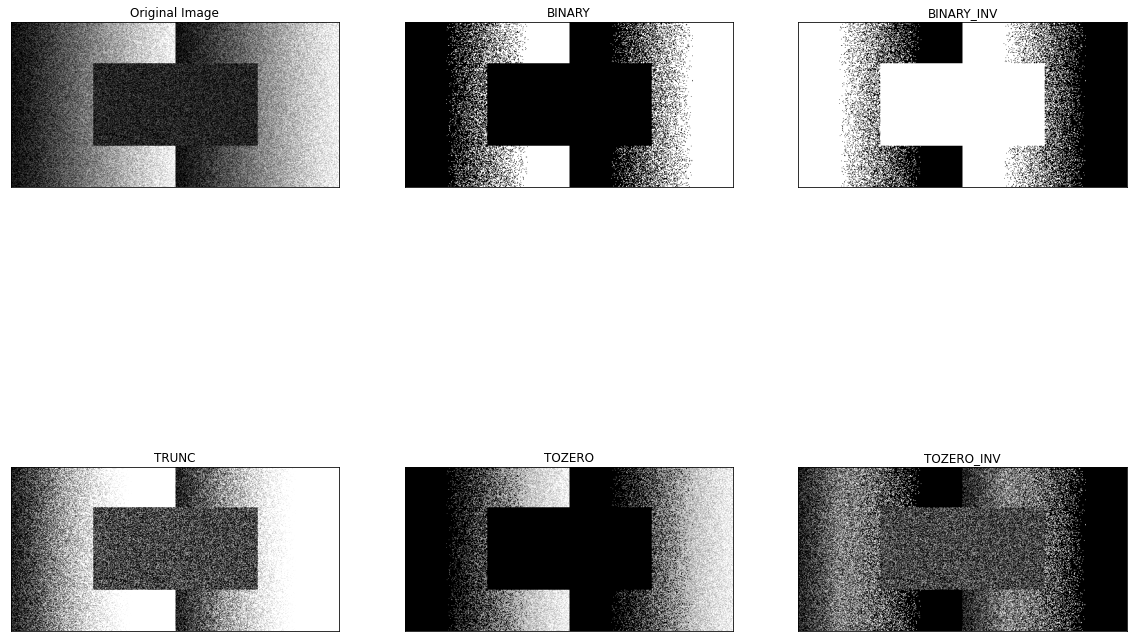

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

ret,thresh1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)  # x 축이127(중앙쯤) 127보다 크면 255로 작으면 0으로
ret,thresh2 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY_INV)  #Binary 반대로
ret,thresh3 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TRUNC)   #127이상을 255로
ret,thresh4 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO)  #Trunc 반대로
ret,thresh5 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO_INV)  #Tozero반대로
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [noiseImg, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()